# I - Préparation de données

## 0-Téléchargement de données

In [30]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

## 1- Informations sur les données

In [32]:
X = mnist.keys()
print("Clés disponibles dans le dataset MNIST:")
print(list(X))

Clés disponibles dans le dataset MNIST:
['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [33]:
import numpy as np

# a. Stocker les données dans la variable X
X = mnist.data
print("a. Variable X créée avec les données")

# b. Afficher la taille des données (nombre de features et taille de chaque feature)
print(f"b. Taille des données X: {X.shape}")
print(f"   - Nombre d'échantillons: {X.shape[0]}")
print(f"   - Nombre de features par échantillon: {X.shape[1]}")

# c. Stocker les classes dans la variable Y
Y = mnist.target
print("\nc. Variable Y créée avec les classes")

# d. Afficher la taille des labels/classes
print(f"d. Taille des labels Y: {Y.shape}")
print(f"   - Nombre total de labels: {Y.shape[0]}")

# e. Afficher les différentes classes de la base de données
classes_uniques = np.unique(Y)
print(f"\ne. Classes uniques dans la base de données: {classes_uniques}")
print(f"   - Nombre de classes différentes: {len(classes_uniques)}")

# f. Description détaillée de la base de données
print("\nf. Description détaillée de la base de données:")
print(mnist.DESCR)

a. Variable X créée avec les données
b. Taille des données X: (70000, 784)
   - Nombre d'échantillons: 70000
   - Nombre de features par échantillon: 784

c. Variable Y créée avec les classes
d. Taille des labels Y: (70000,)
   - Nombre total de labels: 70000

e. Classes uniques dans la base de données: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
   - Nombre de classes différentes: 10

f. Description détaillée de la base de données:
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learni

=== Analyse de la première instance de MNIST ===

a. Affichage de la première instance:
   i. Première instance extraite avec X.values[0]
      Forme originale: (784,)
   ii. Image redimensionnée en 28x28: (28, 28)


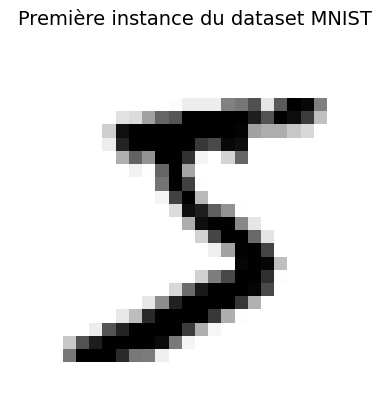

   iii. Image affichée en niveau de gris
        Valeurs min/max des pixels: 0.0 à 255.0

b. Analyse de la première instance:
   - Classe de la première instance: 5
   - Type de la classe: <class 'str'>
   - Type de l'instance (données): <class 'numpy.ndarray'>

=== Conclusion ===
La première image du dataset MNIST représente le chiffre: 5


In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print("=== Analyse de la première instance de MNIST ===\n")

# a. Affichage de la première instance de la base de données
print("a. Affichage de la première instance:")

# i. Utiliser l'attribut "values" du dictionnaire X
premiere_instance = X.values[0]
print(f"   i. Première instance extraite avec X.values[0]")
print(f"      Forme originale: {premiere_instance.shape}")

# ii. Redimensionner via la fonction "reshape" de numpy en taille 28,28
image_2d = premiere_instance.reshape(28, 28)
print(f"   ii. Image redimensionnée en 28x28: {image_2d.shape}")

# iii. Utiliser imshow avec cmap=mpl.cm.binary pour affichage en niveau de gris
plt.figure()
plt.imshow(image_2d, cmap=mpl.cm.binary)
plt.title("Première instance du dataset MNIST", fontsize=14)
plt.axis('off')  # Supprimer les axes pour une meilleure visualisation
plt.show()

print(f"   iii. Image affichée en niveau de gris")
print(f"        Valeurs min/max des pixels: {premiere_instance.min():.1f} à {premiere_instance.max():.1f}")

# b. Afficher la classe et le type de la première instance
print(f"\nb. Analyse de la première instance:")
classe_premiere = Y.iloc[0]  # Utiliser iloc pour pandas Series
print(f"   - Classe de la première instance: {classe_premiere}")
print(f"   - Type de la classe: {type(classe_premiere)}")
print(f"   - Type de l'instance (données): {type(premiere_instance)}")

print(f"\n=== Conclusion ===")
print(f"La première image du dataset MNIST représente le chiffre: {classe_premiere}")

In [35]:
print("=== Conversion des labels en valeurs numériques ===\n")

# Afficher le type actuel des labels
print(f"Type actuel de Y: {type(Y)}")
print(f"Type des éléments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (avant casting): {list(Y.head())}")

# Appliquer le casting sur les labels
Y = Y.astype(np.uint8)

# Vérifier le résultat du casting
print(f"\nAprès casting:")
print(f"Type de Y: {type(Y)}")
print(f"Type des éléments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (après casting): {list(Y.head())}")

# Vérifier que la classe de la première instance est maintenant numérique
classe_premiere_numerique = Y.iloc[0]
print(f"\nClasse de la première instance (numérique): {classe_premiere_numerique}")
print(f"Type de la classe: {type(classe_premiere_numerique)}")
print(f"\n=== Conclusion ===")
print("Les labels ont été convertis en valeurs numériques avec succès.")

=== Conversion des labels en valeurs numériques ===

Type actuel de Y: <class 'pandas.core.series.Series'>
Type des éléments de Y: <class 'str'>
Premiers labels (avant casting): ['5', '0', '4', '1', '9']

Après casting:
Type de Y: <class 'pandas.core.series.Series'>
Type des éléments de Y: <class 'numpy.uint8'>
Premiers labels (après casting): [5, 0, 4, 1, 9]

Classe de la première instance (numérique): 5
Type de la classe: <class 'numpy.uint8'>

=== Conclusion ===
Les labels ont été convertis en valeurs numériques avec succès.


## 2- Répartition des données

In [36]:
print("=== Répartition des données MNIST ===\n")

# Vérification de la taille totale des données
print(f"Taille totale des données: {X.shape[0]} échantillons")
print(f"Taille totale des labels: {Y.shape[0]} échantillons")

# Répartition des données en une seule ligne (indexing sur ndarrays)
# a. Les 60 000 premières images composeront la base d'apprentissage
# b. Le reste des images constitue la base de test
X_train, X_test = X.iloc[:60000], X.iloc[60000:]
Y_train, Y_test = Y.iloc[:60000], Y.iloc[60000:]

print(f"\n=== Résultats de la répartition ===")
print(f"Données d'apprentissage:")
print(f"  - X_train: {X_train.shape} échantillons")
print(f"  - Y_train: {Y_train.shape} labels")

print(f"\nDonnées de test:")
print(f"  - X_test: {X_test.shape} échantillons") 
print(f"  - Y_test: {Y_test.shape} labels")

print(f"\n=== Vérification ===")
print(f"Total apprentissage + test: {X_train.shape[0] + X_test.shape[0]} échantillons")
print(f"Cohérent avec le total original: {X_train.shape[0] + X_test.shape[0] == X.shape[0]}")

print(f"\nRépartition terminée!")
print(f"60 000 échantillons pour l'apprentissage")
print(f"{X_test.shape[0]} échantillons pour le test")

=== Répartition des données MNIST ===

Taille totale des données: 70000 échantillons
Taille totale des labels: 70000 échantillons

=== Résultats de la répartition ===
Données d'apprentissage:
  - X_train: (60000, 784) échantillons
  - Y_train: (60000,) labels

Données de test:
  - X_test: (10000, 784) échantillons
  - Y_test: (10000,) labels

=== Vérification ===
Total apprentissage + test: 70000 échantillons
Cohérent avec le total original: True

Répartition terminée!
60 000 échantillons pour l'apprentissage
10000 échantillons pour le test


# II- Apprentissage d'un classifieur binaire

## 2 - Apprentissage des données

In [37]:
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

print(f"\n=== Résultats de la répartition ===")
print(f"\ny_train_5: {y_train_5}")
print(f"\ny_test_5: {y_test_5}")


=== Résultats de la répartition ===

y_train_5: 0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

y_test_5: 60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool


In [38]:
from sklearn.linear_model import SGDClassifier

# a. Création d'un objet SGDClassifier
sgd_classifier = SGDClassifier()

# b. Application de la méthode fit avec les données de la question 14 (classification binaire)
sgd_classifier.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [40]:
print("=== Prédiction de la première instance avec le modèle SGD ===\n")

# Extraire la première instance (celle de la question 8)
premiere_instance = X.iloc[0:1]  # Utiliser [0:1] pour garder la forme 2D nécessaire
print(f"Forme de la première instance: {premiere_instance.shape}")

# Prédire avec le modèle SGD entraîné
prediction = sgd_classifier.predict(premiere_instance)
print(f"\nPrédiction du modèle:")
print(f"- Résultat: {prediction[0]}")
print(f"- Type: {type(prediction[0])}")

# Vérification avec la vraie classe
vraie_classe = Y.iloc[0]
est_vraiment_5 = (vraie_classe == 5)

print(f"\nComparaison avec la réalité:")
print(f"- Vraie classe de la première instance: {vraie_classe}")
print(f"- Est-ce vraiment un '5'?: {est_vraiment_5}")
print(f"- Prédiction du modèle: {prediction[0]}")

# Résultat de la prédiction
if prediction[0]:
    if est_vraiment_5:
        print(f"\nLe modèle prédit: 'C'est un chiffre 5'")
    else :
        print("\nLe modèle prédit: 'C'est un chiffre 5' (ERREUR)")
else:
    if est_vraiment_5:
        print(f"\nLe modèle prédit: 'Ce n'est PAS un chiffre 5' (ERREUR)")
    else:
        print("\nLe modèle prédit: 'Ce n'est PAS un chiffre 5'")

print(f"\n=== Conclusion ===")
print(f"Prédiction: {'True' if prediction[0] else 'False'}")
print(f"Exactitude: {'Correct' if prediction[0] == est_vraiment_5 else 'Incorrect'}")

=== Prédiction de la première instance avec le modèle SGD ===

Forme de la première instance: (1, 784)

Prédiction du modèle:
- Résultat: True
- Type: <class 'numpy.bool'>

Comparaison avec la réalité:
- Vraie classe de la première instance: 5
- Est-ce vraiment un '5'?: True
- Prédiction du modèle: True

Le modèle prédit: 'C'est un chiffre 5'

=== Conclusion ===
Prédiction: True
Exactitude: Correct


### 2-1- Taux de classification

In [41]:
from sklearn.model_selection import cross_val_score

# Opter pour la valeur accuracy pour l'argument scoring
# a. Afficher le taux de classification (accuracy) de chaque fold
scores = cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(f"Taux de classification (accuracy) pour chaque fold: {scores}")
# b. Afficher la moyenne du taux de classification
print(f"Moyenne du taux de classification: {scores.mean():.4f}")

Taux de classification (accuracy) pour chaque fold: [0.96875 0.96325 0.9651 ]
Moyenne du taux de classification: 0.9657


In [44]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, data, labels):
        pass

    def predict(self, data):
        '''Prend en argument les données et retourne une 
structure de données ayant la taille des données et qui contient que la 
valeur False (= non-5)'''
        return np.zeros((data.shape[0],), dtype=bool)
    
# c. Créez un objet de la classe Never5Classifier
never_5_classifier = Never5Classifier()

# d. Testez le classifieur Never5Classifier en utilisant une validation croisée de type 3-fold cross-validation.
# i. Afficher le taux de classification (accuracy) de chaque fold
scores_never5 = cross_val_score(never_5_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(f"\nTaux de classification (accuracy) pour chaque fold avec Never5Classifier: {scores_never5}")
# ii. Afficher la moyenne du taux de classification
print(f"Moyenne du taux de classification avec Never5Classifier: {scores_never5.mean():.4f}")


Taux de classification (accuracy) pour chaque fold avec Never5Classifier: [0.91125 0.90855 0.90915]
Moyenne du taux de classification avec Never5Classifier: 0.9096


### 2-2- Matrice de confusion

In [45]:
from sklearn.model_selection import cross_val_predict

print("=== Évaluation du classifieur SGD avec cross_val_predict ===\n")

# Utiliser cross_val_predict pour obtenir les classes prédites
# Cette fonction retourne les prédictions pour chaque échantillon lors de la validation croisée 3-fold
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

print(f"Type des prédictions: {type(y_train_pred)}")
print(f"Forme des prédictions: {y_train_pred.shape}")
print(f"Type des éléments: {type(y_train_pred[0])}")

# Afficher quelques exemples de prédictions
print(f"\nPremières 20 prédictions: {y_train_pred[:20]}")
print(f"Dernières 20 prédictions: {y_train_pred[-20:]}")

# Compter les prédictions True et False
nb_true = np.sum(y_train_pred)
nb_false = len(y_train_pred) - nb_true

print(f"\n=== Statistiques des prédictions ===")
print(f"Nombre total de prédictions: {len(y_train_pred)}")
print(f"Prédictions 'True' (chiffre 5): {nb_true}")
print(f"Prédictions 'False' (non-5): {nb_false}")
print(f"Pourcentage de 'True': {(nb_true / len(y_train_pred) * 100):.2f}%")
print(f"Pourcentage de 'False': {(nb_false / len(y_train_pred) * 100):.2f}%")

# Comparer avec les vraies valeurs
nb_vraies_5 = np.sum(y_train_5)
print(f"\n=== Comparaison avec la réalité ===")
print(f"Vraies instances de '5' dans l'entraînement: {nb_vraies_5}")
print(f"Vraies instances de 'non-5' dans l'entraînement: {len(y_train_5) - nb_vraies_5}")

print(f"\n=== Résultats de cross_val_predict ===")
print("Les prédictions ont été obtenues pour tous les échantillons d'entraînement")
print("Chaque échantillon a été prédit exactement une fois lors de la validation croisée")

=== Évaluation du classifieur SGD avec cross_val_predict ===

Type des prédictions: <class 'numpy.ndarray'>
Forme des prédictions: (60000,)
Type des éléments: <class 'numpy.bool'>

Premières 20 prédictions: [ True False False False False False False False False False False  True
 False False False False False False False False]
Dernières 20 prédictions: [False False False False False False False False False False False False
 False  True False False False  True False False]

=== Statistiques des prédictions ===
Nombre total de prédictions: 60000
Prédictions 'True' (chiffre 5): 6843
Prédictions 'False' (non-5): 53157
Pourcentage de 'True': 11.40%
Pourcentage de 'False': 88.59%

=== Comparaison avec la réalité ===
Vraies instances de '5' dans l'entraînement: 5421
Vraies instances de 'non-5' dans l'entraînement: 54579

=== Résultats de cross_val_predict ===
Les prédictions ont été obtenues pour tous les échantillons d'entraînement
Chaque échantillon a été prédit exactement une fois lors d

=== Matrice de confusion du classifieur SGD ===

Matrice de confusion (valeurs absolues):
[[52312  2267]
 [  845  4576]]

Matrice de confusion normalisée:
[[0.95846388 0.04153612]
 [0.1558753  0.8441247 ]]


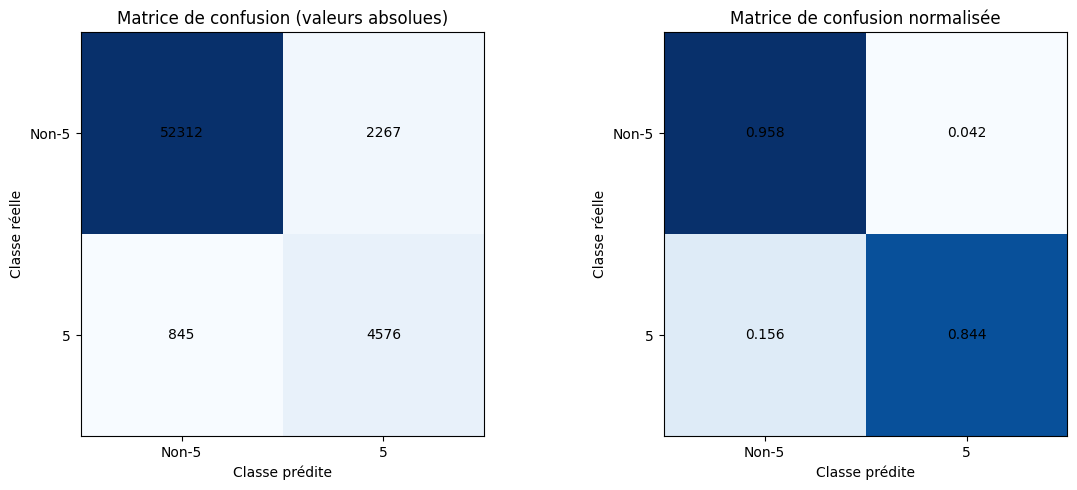


=== Interprétation de la matrice de confusion ===

Valeurs de la matrice (absolues):
• Vrais Négatifs (TN): 52312 - Correctement classés comme 'Non-5'
• Faux Positifs (FP): 2267 - Incorrectement classés comme '5' (Erreur Type I)
• Faux Négatifs (FN): 845 - Incorrectement classés comme 'Non-5' (Erreur Type II)
• Vrais Positifs (TP): 4576 - Correctement classés comme '5'

Pourcentages (normalisés):
• Spécificité (TN rate): 0.958 - 95.8% des 'Non-5' bien identifiés
• Taux FP (FP rate): 0.042 - 4.2% des 'Non-5' mal classés comme '5'
• Taux FN (FN rate): 0.156 - 15.6% des '5' mal classés comme 'Non-5'
• Sensibilité (TP rate): 0.844 - 84.4% des '5' bien identifiés


In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print("=== Matrice de confusion du classifieur SGD ===\n")

# Calculer la matrice de confusion normale
cm = confusion_matrix(y_train_5, y_train_pred)
print("Matrice de confusion (valeurs absolues):")
print(cm)

# Calculer la matrice de confusion normalisée
cm_normalized = confusion_matrix(y_train_5, y_train_pred, normalize='true')
print("\nMatrice de confusion normalisée:")
print(cm_normalized)

# Visualisation des matrices de confusion avec matplotlib uniquement
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matrice de confusion absolue
im1 = axes[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Matrice de confusion (valeurs absolues)')
axes[0].set_xlabel('Classe prédite')
axes[0].set_ylabel('Classe réelle')

# Ajouter les annotations manuellement
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0].text(j, i, format(cm[i, j], 'd'), 
                    ha="center", va="center", color="black")

# Ajouter les labels des axes
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Non-5', '5'])
axes[0].set_yticklabels(['Non-5', '5'])

# Matrice de confusion normalisée
im2 = axes[1].imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Matrice de confusion normalisée')
axes[1].set_xlabel('Classe prédite')
axes[1].set_ylabel('Classe réelle')

# Ajouter les annotations pour la matrice normalisée
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        axes[1].text(j, i, format(cm_normalized[i, j], '.3f'), 
                    ha="center", va="center", color="black")

# Ajouter les labels des axes
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Non-5', '5'])
axes[1].set_yticklabels(['Non-5', '5'])

plt.tight_layout()
plt.show()

# Interprétation détaillée de la matrice de confusion
print("\n=== Interprétation de la matrice de confusion ===")
tn, fp, fn, tp = cm.ravel()

print(f"\nValeurs de la matrice (absolues):")
print(f"• Vrais Négatifs (TN): {tn} - Correctement classés comme 'Non-5'")
print(f"• Faux Positifs (FP): {fp} - Incorrectement classés comme '5' (Erreur Type I)")
print(f"• Faux Négatifs (FN): {fn} - Incorrectement classés comme 'Non-5' (Erreur Type II)")
print(f"• Vrais Positifs (TP): {tp} - Correctement classés comme '5'")

print(f"\nPourcentages (normalisés):")
print(f"• Spécificité (TN rate): {cm_normalized[0,0]:.3f} - {cm_normalized[0,0]*100:.1f}% des 'Non-5' bien identifiés")
print(f"• Taux FP (FP rate): {cm_normalized[0,1]:.3f} - {cm_normalized[0,1]*100:.1f}% des 'Non-5' mal classés comme '5'")
print(f"• Taux FN (FN rate): {cm_normalized[1,0]:.3f} - {cm_normalized[1,0]*100:.1f}% des '5' mal classés comme 'Non-5'")
print(f"• Sensibilité (TP rate): {cm_normalized[1,1]:.3f} - {cm_normalized[1,1]*100:.1f}% des '5' bien identifiés")


### 2-3- Précision et rappel

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("=== Calcul des métriques de performance avec sklearn.metrics ===\n")

# Calculer la précision
precision = precision_score(y_train_5, y_train_pred)
print(f"Précision (Precision): {precision:.4f}")

# Calculer le rappel
recall = recall_score(y_train_5, y_train_pred)
print(f"Rappel (Recall): {recall:.4f}")

# Calculer le score F1
f1 = f1_score(y_train_5, y_train_pred)
print(f"Score F1: {f1:.4f}")

print(f"\n=== Interprétation des résultats ===")

print(f"\n1. PRÉCISION = {precision:.4f} ({precision*100:.2f}%)")
print(f"   • Sur toutes les images que le modèle a classées comme '5',")
print(f"     {precision*100:.2f}% sont réellement des '5'")
print(f"   • {(1-precision)*100:.2f}% sont des faux positifs (erreurs)")

print(f"\n2. RAPPEL = {recall:.4f} ({recall*100:.2f}%)")
print(f"   • Sur toutes les vraies images de '5' dans la base,")
print(f"     le modèle en a détecté {recall*100:.2f}%")
print(f"   • Il a manqué {(1-recall)*100:.2f}% des vrais '5' (faux négatifs)")

print(f"\n3. SCORE F1 = {f1:.4f} ({f1*100:.2f}%)")
print(f"   • Moyenne harmonique entre précision et rappel")
print(f"   • Mesure équilibrée des performances globales")

print(f"\n=== Analyse comparative ===")
if precision > recall:
    print(f"✓ Précision > Rappel : Le modèle est plutôt conservateur")
    print(f"  → Il évite les faux positifs mais manque quelques vrais '5'")
elif recall > precision:
    print(f"✓ Rappel > Précision : Le modèle est plutôt libéral")
    print(f"  → Il détecte bien les '5' mais fait quelques erreurs en trop")
else:
    print(f"✓ Précision ≈ Rappel : Modèle équilibré")

# Évaluation globale
if f1 >= 0.8:
    print(f"\n🎯 CONCLUSION: Performances EXCELLENTES (F1 ≥ 80%)")
elif f1 >= 0.6:
    print(f"\n✅ CONCLUSION: Performances BONNES (F1 ≥ 60%)")
elif f1 >= 0.4:
    print(f"\n⚠️  CONCLUSION: Performances MOYENNES (F1 ≥ 40%)")
else:
    print(f"\n❌ CONCLUSION: Performances FAIBLES (F1 < 40%)")

=== Calcul des métriques de performance avec sklearn.metrics ===

Précision (Precision): 0.6687
Rappel (Recall): 0.8441
Score F1: 0.7462

=== Interprétation des résultats ===

1. PRÉCISION = 0.6687 (66.87%)
   • Sur toutes les images que le modèle a classées comme '5',
     66.87% sont réellement des '5'
   • 33.13% sont des faux positifs (erreurs)

2. RAPPEL = 0.8441 (84.41%)
   • Sur toutes les vraies images de '5' dans la base,
     le modèle en a détecté 84.41%
   • Il a manqué 15.59% des vrais '5' (faux négatifs)

3. SCORE F1 = 0.7462 (74.62%)
   • Moyenne harmonique entre précision et rappel
   • Mesure équilibrée des performances globales

=== Analyse comparative ===
✓ Rappel > Précision : Le modèle est plutôt libéral
  → Il détecte bien les '5' mais fait quelques erreurs en trop

✅ CONCLUSION: Performances BONNES (F1 ≥ 60%)


In [54]:
from sklearn.model_selection import cross_val_predict
import numpy as np

print("=== Calcul des scores de décision avec cross_val_predict ===\n")

# Utiliser cross_val_predict avec method='decision_function' pour obtenir les scores
# Cette fonction retourne les scores de décision pour chaque échantillon lors de la validation croisée 3-fold
y_train_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method='decision_function')

print(f"Type des scores: {type(y_train_scores)}")
print(f"Forme des scores: {y_train_scores.shape}")
print(f"Type des éléments: {type(y_train_scores[0])}")

# Afficher quelques exemples de scores
print(f"\nPremiers 20 scores: {y_train_scores[:20]}")
print(f"Derniers 20 scores: {y_train_scores[-20:]}")

# Statistiques des scores
print(f"\n=== Statistiques des scores de décision ===")
print(f"Nombre total de scores: {len(y_train_scores)}")
print(f"Score minimum: {y_train_scores.min():.4f}")
print(f"Score maximum: {y_train_scores.max():.4f}")
print(f"Score moyen: {y_train_scores.mean():.4f}")
print(f"Écart-type: {y_train_scores.std():.4f}")

# Compter les scores positifs et négatifs (seuil par défaut = 0)
scores_positifs = np.sum(y_train_scores > 0)
scores_negatifs = np.sum(y_train_scores <= 0)

print(f"\n=== Répartition selon le seuil par défaut (0) ===")
print(f"Scores positifs (> 0): {scores_positifs} - Prédits comme '5'")
print(f"Scores négatifs (≤ 0): {scores_negatifs} - Prédits comme 'Non-5'")
print(f"Pourcentage de scores positifs: {(scores_positifs / len(y_train_scores) * 100):.2f}%")
print(f"Pourcentage de scores négatifs: {(scores_negatifs / len(y_train_scores) * 100):.2f}%")

# Comparaison avec les prédictions binaires précédentes
predictions_binaires = (y_train_scores > 0)
coherence = np.array_equal(predictions_binaires, y_train_pred)
print(f"\n=== Vérification de cohérence ===")
print(f"Les prédictions binaires (score > 0) correspondent aux prédictions précédentes: {coherence}")

print(f"\n=== Conclusion ===")
print("Les scores de décision permettent de comprendre la 'confiance' du modèle:")
print("• Plus le score est élevé, plus le modèle est confiant que c'est un '5'")
print("• Plus le score est faible (négatif), plus le modèle est confiant que ce n'est PAS un '5'")
print("• Le seuil par défaut de 0 sépare les deux classes")

=== Calcul des scores de décision avec cross_val_predict ===

Type des scores: <class 'numpy.ndarray'>
Forme des scores: (60000,)
Type des éléments: <class 'numpy.float64'>

Premiers 20 scores: [  2233.76472412 -16999.83146625 -29880.24945215 -16853.32804962
 -18123.62732289 -16786.05163476 -14344.66419922 -19160.60912277
  -6866.69750684 -13676.7779591  -17430.53807378    764.86406397
 -32548.13164662 -17809.33743497  -5282.69063153 -17399.14087231
 -24825.67568325 -17165.2237745   -4832.03170209 -23564.24796162]
Derniers 20 scores: [ -2239.56847032 -12125.14890084  -6850.7198163  -20119.91822338
 -11602.78108538 -24718.65480959  -4477.63088789  -7211.15680865
  -6894.02349027  -6421.21472386  -9677.81738926 -10311.26010833
  -3368.75566452   5493.88995718  -3859.07168195 -11446.19872796
 -10968.14148588   3272.83384068  -3009.89051515  -8557.27433151]

=== Statistiques des scores de décision ===
Nombre total de scores: 60000
Score minimum: -122128.9854
Score maximum: 33569.8437
Score